**Linear Regression**

In [ ]:
#This source code is based on the regression program made in tutorial on Feb 3 2022 in BMEN 415
#Submitted by: John Cedric Acierto
#BMEN 415 - Sensor Systems and Data Analytics

#Import Section:

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression

import os 


In [ ]:
#Read in csv file:
df = pd.read_csv('Volumetric_features.csv')

#Data Summary:

#Choosing specific columns:
df = df[['S.No', 'Left-Lateral-Ventricle', 'Left-Inf-Lat-Vent', 'Left-Cerebellum-White-Matter', 'Left-Cerebellum-Cortex',
         'Left-Thalamus', 'Left-Caudate', 'Left-Putamen', 'Left-Pallidum', '3rd-Ventricle', '4th-Ventricle', 'Brain-Stem', 
         'Left-Hippocampus', 'Left-Amygdala', 'CSF', 'Left-Accumbens-area', 'Left-VentralDC', 'Left-vessel', 'Left-choroid-plexus',
         'Right-Lateral-Ventricle', 'Right-Inf-Lat-Vent', 'Age']]


print(df)


      S.No  Left-Lateral-Ventricle  Left-Inf-Lat-Vent  \
0        1                 22916.9              982.7   
1        2                 22953.2              984.5   
2        3                 23320.4             1062.1   
3        4                 24360.0             1000.5   
4        5                 25769.4             1124.4   
...    ...                     ...                ...   
4221  4222                 27065.6              532.4   
4222  4223                 28408.8              912.7   
4223  4224                 34467.9             1659.6   
4224  4225                 31627.5             1334.4   
4225  4226                 14879.4              704.2   

      Left-Cerebellum-White-Matter  Left-Cerebellum-Cortex  Left-Thalamus  \
0                          15196.7                 55796.4         6855.5   
1                          15289.7                 55778.6         6835.1   
2                          15382.1                 55551.2         7566.0   
3      

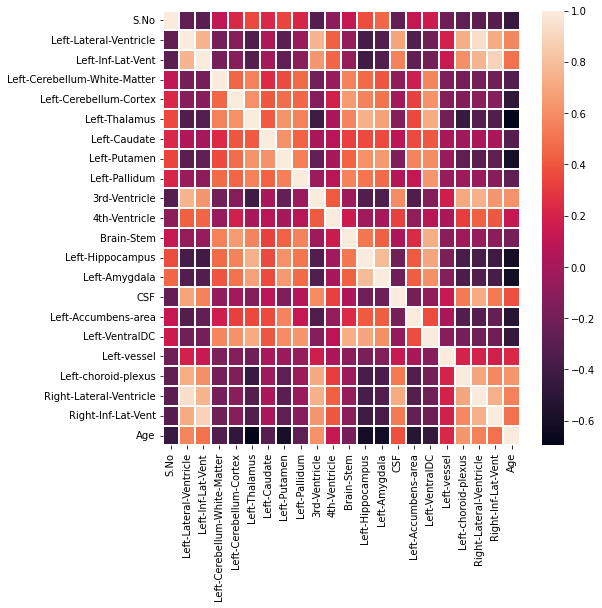

In [ ]:
#Make a Heatmap
fig, axes = plt.subplots(figsize=(8,8))
sns.heatmap(data = df.corr(), linewidths = 1, ax = axes)
plt.show()

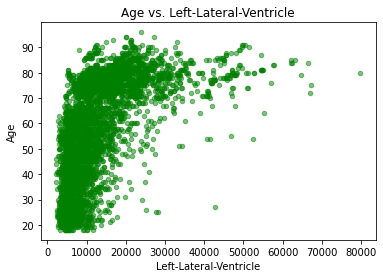

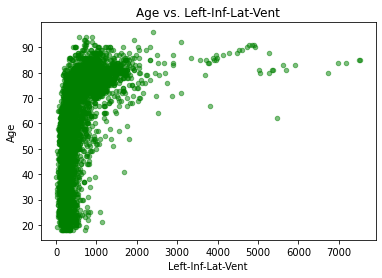

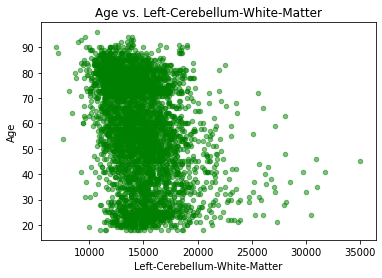

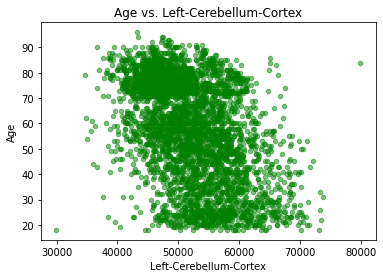

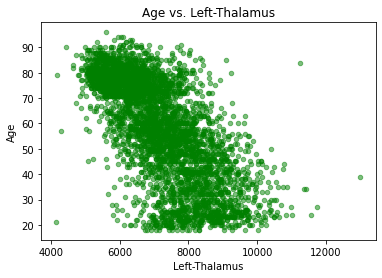

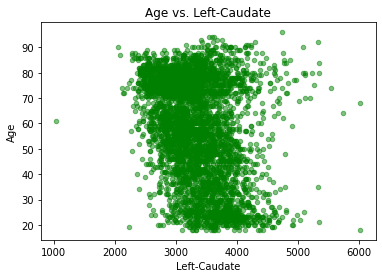

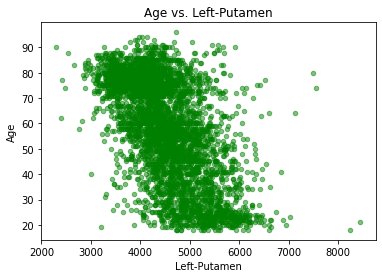

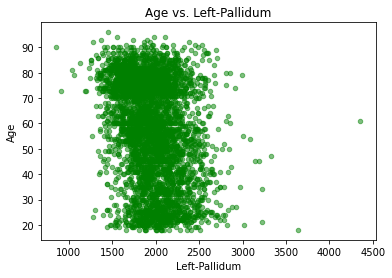

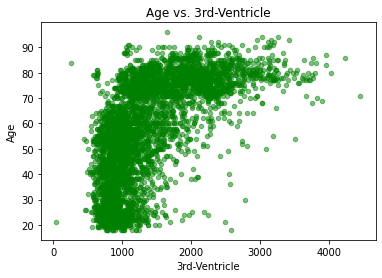

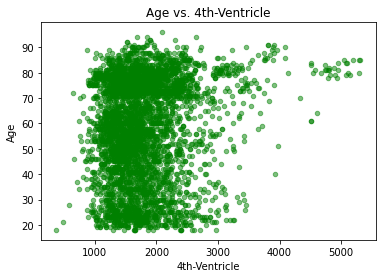

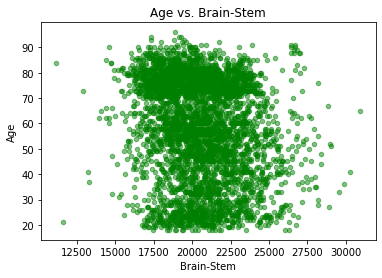

In [ ]:
features = ['Left-Lateral-Ventricle', 'Left-Inf-Lat-Vent', 'Left-Cerebellum-White-Matter', 'Left-Cerebellum-Cortex',
         'Left-Thalamus', 'Left-Caudate', 'Left-Putamen', 'Left-Pallidum', '3rd-Ventricle', '4th-Ventricle', 'Brain-Stem']

for x in features:
  comb = 'Age vs. ' + x
  df.plot(kind='scatter', x = x, y = 'Age', alpha = 0.5, color='green', title = comb)


**Polynomial Regression**

In [ ]:
x = df.drop(columns = ["S.No", "Age"])  #feature columns
y = df[['Age']] #target column


poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)


In [ ]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train, y_train)

LinearRegression()

Train RMSE for Polynomial Regression:  8.173005065547716
Test RMSE for Polynomial Regression (degree = 2):  8.709569066460515


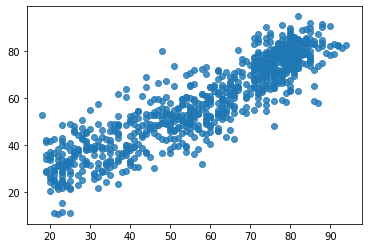

In [ ]:
train_poly_reg_y_predicted = poly_reg_model.predict(x_train)
poly_reg_y_predicted = poly_reg_model.predict(x_test)

train_poly_reg_rmse = np.sqrt(mean_squared_error(y_train, train_poly_reg_y_predicted))
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))

print('Train RMSE for Polynomial Regression: ', train_poly_reg_rmse)
print('Test RMSE for Polynomial Regression (degree = 2): ', poly_reg_rmse)


plt.scatter(y_test, poly_reg_y_predicted, alpha = 0.8)

**Random Forest Regression**

In [ ]:
#Reintroduce x and y here for clarity:
x = df.drop(columns = ["S.No", "Age"])  #feature columns
y = df[["Age"]] #target column 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [ ]:
#Making the model:
rf_regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
rf_regressor.fit(x_train, y_train)

y_pred_train = rf_regressor.predict(x_train)
y_pred = rf_regressor.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Train Random Forest RMSE 3.51842918571786
Test Random Forest RMSE:  8.171095918580217


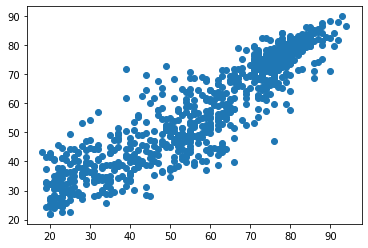

In [ ]:
train_randomforest_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
randomforest_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Train Random Forest RMSE", train_randomforest_rmse)
print("Test Random Forest RMSE: ", randomforest_rmse)


plt.scatter(y_test, y_pred)

**PLS Regression**

In [ ]:
#Reintroduce x and y here for clarity:
x = df.drop(columns = ["S.No", "Age"])  #feature columns
y = df[["Age"]] #target column 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Train PLS Regression RMSE:  11.77463011651005
Test PLS Regression RMSE:  11.80549694588261


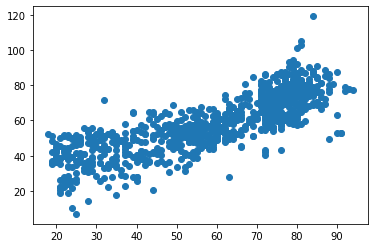

In [ ]:
#Making the model:

pls = PLSRegression(n_components = 2)

pls.fit(x_train, y_train)

y_pred_train = pls.predict(x_train)
y_pred = pls.predict(x_test)

train_pls_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
pls_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Train PLS Regression RMSE: ", train_pls_rmse)
print("Test PLS Regression RMSE: ", pls_rmse)

plt.scatter(y_test, y_pred)

Summary:

RMSE for Polynomial Regression (degree = 2):  8.709569066460515

Random Forest Regression RMSE:  8.467955345329619

PLS Regression RMSE:  10.263269301099136
